## **Data Analysis using python - Pizza_Sales_Analysis**

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import Raw data
df = pd.read_csv("pizza_sales.csv")

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape

(48620, 12)

In [5]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


### Data Cleaning

In [8]:
# Convert order_date and order_time
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time

# Create new columns order_day and order_month 
df['day_name'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()


### **BUSINESS REQUIREMENTS**

### KPI's

In [9]:
#Total Revenue
total_revenue = df['total_price'].sum()

#Average Order Value
avg_order_value = df.groupby('order_id')['total_price'].sum().mean()

#Total Pizzas Sold
total_pizzas_sold = df['quantity'].sum()

#Total Orders
total_orders = df['order_id'].nunique()

#Average Pizzas Per Order
avg_pizzas_per_order = df.groupby('order_id')['quantity'].sum().mean()


print(f" Total Revenue: ${total_revenue:,.2f}")
print(f" Average Order Value: ${avg_order_value:,.2f}")
print(f" Total Pizzas Sold: {total_pizzas_sold}")
print(f" Total Orders: {total_orders}")
print(f" Avg Pizzas Per Order: {avg_pizzas_per_order:.2f}")

 Total Revenue: $817,860.05
 Average Order Value: $38.31
 Total Pizzas Sold: 49574
 Total Orders: 21350
 Avg Pizzas Per Order: 2.32


### CHARTS 


#### Revenue by Pizza Category and Size

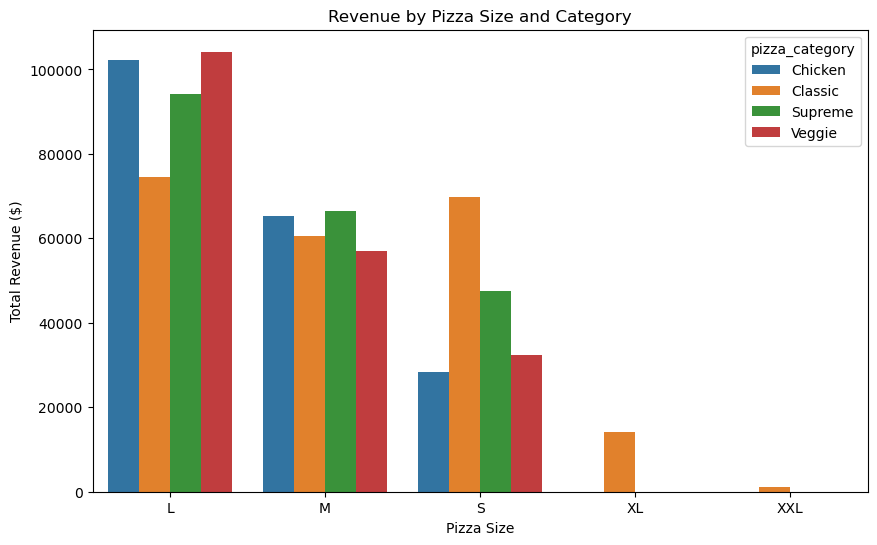

In [10]:
cat_size_rev = df.groupby(['pizza_category', 'pizza_size'])['total_price'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=cat_size_rev, x='pizza_size', y='total_price', hue='pizza_category')
plt.title('Revenue by Pizza Size and Category')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Pizza Size')
plt.show()


#### Percentage Sales by Category

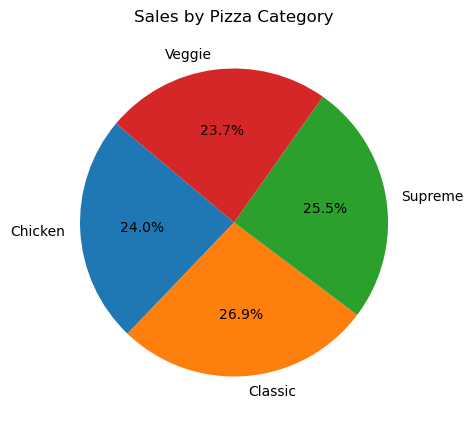

In [11]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
size_sales = df.groupby('pizza_size')['total_price'].sum()

# Category pie chart
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(5,5), title='Sales by Pizza Category')
plt.ylabel('')
plt.show()


#### Percentage Sales by Size

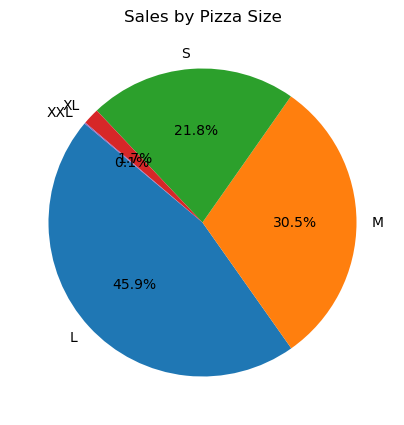

In [12]:
# Size pie chart
size_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(5,5), title='Sales by Pizza Size')
plt.ylabel('')
plt.show()


#### Daily Order Trend

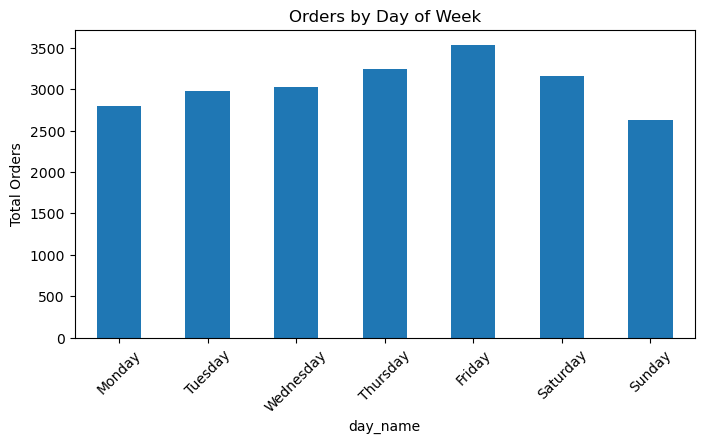

In [13]:
# Daily Trend
day_orders = df.groupby('day_name')['order_id'].nunique().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

day_orders.plot(kind='bar', figsize=(8,4), title='Orders by Day of Week', ylabel='Total Orders')
plt.xticks(rotation=45)
plt.show()



#### Monthy Order Trend

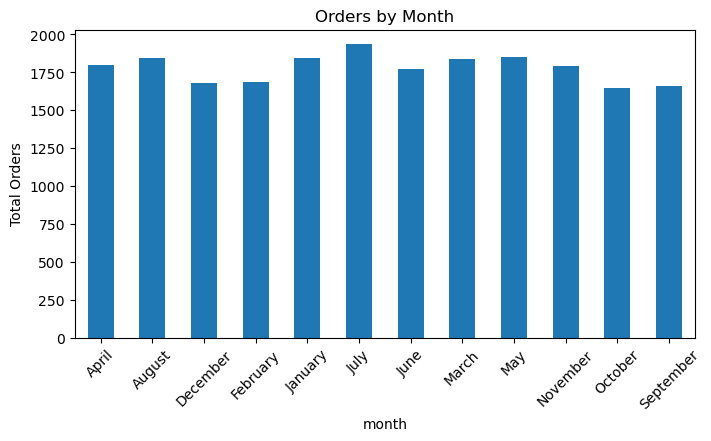

In [14]:
# Monthly Trend
month_orders = df.groupby('month')['order_id'].nunique()
month_orders.plot(kind='bar', figsize=(8,4), title='Orders by Month', ylabel='Total Orders')
plt.xticks(rotation=45)
plt.show()


#### Top 5 Pizzas By Revenue

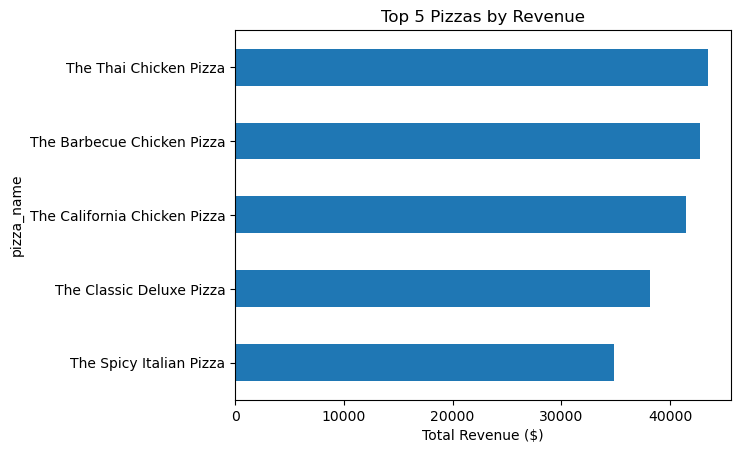

In [15]:
# By Revenue
top_revenue = df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head(5)
top_revenue.plot(kind='barh', title='Top 5 Pizzas by Revenue')
plt.xlabel('Total Revenue ($)')
plt.gca().invert_yaxis()
plt.show()


#### Top 5 Pizzas by Total Orders

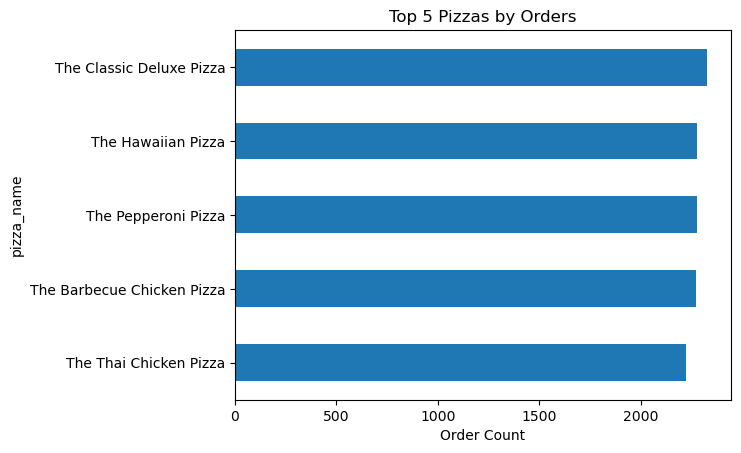

In [16]:
# By Total Orders
top_orders = df.groupby('pizza_name')['order_id'].nunique().sort_values(ascending=False).head(5)
top_orders.plot(kind='barh', title='Top 5 Pizzas by Orders')
plt.xlabel('Order Count')
plt.gca().invert_yaxis()
plt.show()
